# Matplotlib: Plotting using Python
The [matplotlib library](https://matplotlib.org/index.html) is one of the most useful and used tools within python. With its consistent and relatively simple framework, you can create complex publication-worthy figures with ease*. This session will cover the basics of plotting and formatting in the scripted framework, while Matplotlib II will introduce the object-oriented framework and a variety of plots. Various links are documented below, but I'll also include them here for ease:
1. the latest [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
2. a page with [examples](https://matplotlib.org/gallery/index.html) that include source code for each plot
3. a page with additional [tutorials](https://matplotlib.org/tutorials/index.html) for the studious matplotlib student
4. another [matplotlib function index](https://matplotlib.org/api/pyplot_api.html) for an older version of matplotlib, but each function is defined on that page instead of requiring you click a link

### With that, let's get started!

*_ Some Googling for StackOverflow discussions may be necessary._

In [1]:
import matplotlib.pyplot as plt

## The ```plt.plot()``` command
Okay, now that we've loaded matplotlib.pyplot, let's make the most basic plot: we'll just supply a list of numbers.

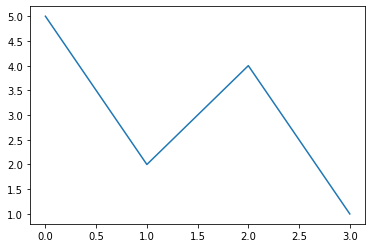

In [4]:
plt.plot([5, 2, 4, 1]);

And that's it! Because we only supplied a single list, it assumed those were the y points and provided a set of x points: the list [0, 1, 2, ...] up to however many points you supplied. It also used a set of default formatting options, which we can change later.

Next, let's supply both x and y points:

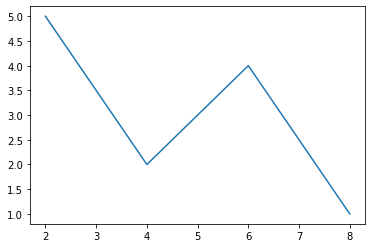

In [5]:
x = [2, 4, 6, 8]
y = [5, 2, 4, 1]

plt.plot(x,y);

## Plot Formatting
Now, let's add a few extra features to our plot. Here, we'll 
1. make two calls to ```plt.plot()```
2. add a vertical line using ```plt.axvline()```
3. add a horizontal line with ```plt.axhline()```
4. label each line using the ```label="your-name-here"``` keyword
5. add a legend based on those plot labels with ```plt.legend()```

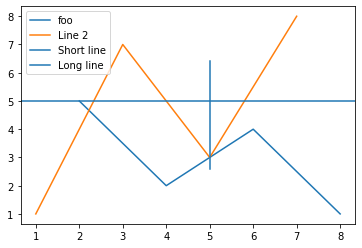

In [6]:
# Another set of values
x2 = [1, 3, 5, 7]
y2 = [1, 7, 3, 8]

# Main plotting calls
plt.plot(x, y, label='foo')
plt.plot(x2, y2, label='Line 2')

# Adding a vertical line and a horizontal line
plt.axvline(5, ymin=0.25, ymax=0.75, label='Short line')
plt.axhline(5, xmin=0.0, xmax=1.0, label='Long line')

# Legend
plt.legend();

So, telling apart the lines up above became very difficult, even with the legend! Thankfully, there are many keywords you can use to customize your plots. The default colors and styles are decent, but for publication-worthy plots, you'll want to have as much control as possible. We'll step through some of the many customizations in the next few cells.

### Markers and Line Styles
First, we'll look at the keyword arguments (```**kwargs```) that we can provide to make our lines look unique. We'll just look at a small selection that are available.
1. ```color```: color of the line, can be an HTML color name ('red', 'darkred', 'black'), a hex string ('#008000'), RGB/RGBA tuple ((0,1,0,1)), grayscale intensities as a string ('0.5'), and several other settings I won't detail here
2.  ```linestyle or ls```: style of the line that is plotted; can be 'None' or a variety of styles, like '-' for solid, '--' dashed, '-.' dashed dot, ':' dotted; default is '-', so you have to specify 'None' if you just want markers for points
3.  ```linewidth or lw```: thickness of the line
4.  ```alpha```: transparency of the line, with 1.0 => 100% => completely solid and so on
5.  ```marker```: point style for markers; a few examples include 'o': circle; '.': point; 's': square; '*': star; 'v'/'^'/'<'/'>': triangle up/down/left/right
6.  ```markersize or ms```: size of the markers
7.  ```markeredgecolor or mec```: color of the marker edge; defaults to whatever the ```color``` kwarg is set to, but can be any valid color as described above
8.  ```markeredgewidth or mew```: thickness of the marker edge
9.  ```zorder```: order in which the points are displayed wherever they overlap, with lower numbers being displayed underneath higher zordered plot calls

**Note**: If you provide a value to ```marker``` and ```ls``` is anything other than 'None', _including not specified_, then the marker will be plotted on top of a line of the same color as the marker. You can easily check this in the code below.

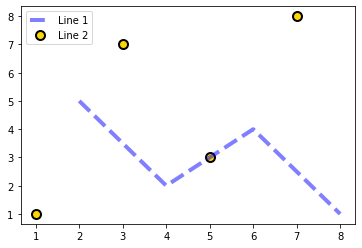

In [7]:
# Main plotting calls
plt.plot(x, y, 
         color = 'blue',
         ls = '--',
         lw = 4,
         alpha=0.5,
         label='Line 1',
         zorder = 2)

plt.plot(x2, y2, 
         color = 'gold',
         ls = 'None',      # Required for the line portion to go away
         marker = 'o',
         ms = 9,
         mec = 'black',
         mew = 2,
         label='Line 2',
         zorder = 1)

# Legend
plt.legend();

### Legends
We can also customize the legend quite a bit! Here's a list of some of the most useful keywords for the ```plt.legend()``` command, in my experience (there are others, check out the docs for more details).
1. ```fontsize```: size of the text in the legend; can be numeric (12, 25, etc.) and will be the absolute font size in points, or a string ('small', 'medium', 'xx-large') where the point size is scaled based on the _default_ font size
2. ```ncol```: number of columns in the legend
3. ```numpoints```: number of points to show per entry for plot calls with ```marker = ...```
4. ```frameon```: whether to include a frame around the legend
5. ```fancybox```: whether to round the edges of the legend frame; ignorerd if ```frameon=False```
6. ```edgecolor```: color of the legend frame; as before, any valid color
7. ```loc```: location of the legend; can be a string or an integer that refer to a pre-set position ('upper right' and 5 indicate the same location, see the docs for the 11 options) or a pair of floats (where (0.3, 0.5) means the bottom left corner is 30% to the right of the origin, 50% up)

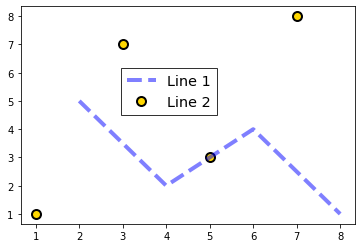

In [9]:
# Main plotting calls
plt.plot(x, y, color = 'blue', ls = '--', lw = 4, alpha=0.5, label='Line 1', zorder = 2)
plt.plot(x2, y2, color = 'gold', ls = 'None', marker = 'o', ms = 9, mec = 'black',
         mew = 2, label='Line 2', zorder = 1)

# Legend
plt.legend(fontsize='x-large',
           ncol=1,
           numpoints=1,
           fancybox=False,
           frameon=True,
           edgecolor='black',
           loc=(0.3,0.5));

### Formatting Axes
So far, we've focused on formatting the actual lines, but clear, informative axes make the plot actually useful. There are a number of ways we can alter the axes shown above. Each of the commands listed below can be applied to the y-axes by changing 'x' to 'y'.
1. ```plt.xlabel()```: string that labels the x-axis; can include LaTex math with a raw string, i.e., r'$math stuff$'; text attributes like color and fontsize apply, and you can select the rotation and placement of the label
2. ```plt.xlim()```: the minimum and maximum limits of the x-axis; you can supply both without keywords, or you can include just one: ```plt.xlim(xmax=5)``` if you want to leave ```xmin``` unchanged, etc. 
3. ```plt.xticks()```: allows for choosing placement and labels for major ticks; the first list or array of values determines the placement, and the second array determines the labels on those ticks; text attributes like color, fontsize, rotation, etc. also apply

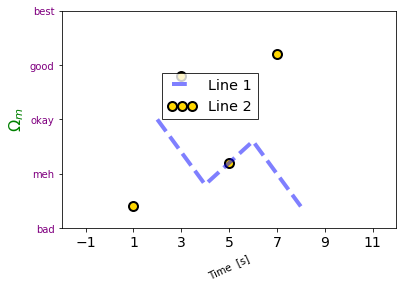

In [10]:
# Main plotting calls
plt.plot(x, y, color = 'blue', ls = '--', lw = 4, alpha=0.5, label='Line 1', zorder = 2)
plt.plot(x2, y2, color = 'gold', ls = 'None', marker = 'o', ms = 9, mec = 'black',
         mew = 2, label='Line 2', zorder = 1)

# Legend
plt.legend(fontsize='x-large', ncol=1, numpoints=3, fancybox=False, 
           frameon=True, edgecolor='black', loc=(0.3,0.5))

# Axes labels
plt.xlabel('Time  [s]', fontsize=10, rotation=25)
plt.ylabel(r'$\Omega_{m}$', fontsize=16, color='green')

# Axes limits
plt.xlim(xmin=-2, xmax=12)
plt.ylim(0, 10)

# Tick locators and labels
plt.xticks([-1, 1, 3, 5, 7, 9, 11], fontsize=14)
plt.yticks([0, 2.5, 5, 7.5, 10], ['bad', 'meh', 'okay', 'good', 'best'], color='purple');

### Some Final Touches
There are still many other useful features we could add to our plot. We'll highlight just four here, but don't worry. If you can imagine it, you can probably find a way to make it in matplotlib!
1. ```plt.title()```: set the title for your plot; follows most text properties, but to change the font size and weight, you have to supply it in a dictionary format before any other keywords (see example below)
2. ```plt.text()```: add text to a plot; the first two arguments are the absolute x and y positions for the text, and the third argument is the actual text to display; LaTex math can be rendered with a raw string (r'$math$'); most other text properties will also apply
3. ```plt.grid()```: True or False for whether to include a grid; keywords include: ```which=``` determines the set of ticks that are gridded and can be 'major' or 'minor'*; ```axis=``` determines which axis gets gridded lines, and can be 'x', 'y', or 'both'
4. ```ax = plt.gca()``` => ```ax.set_facecolor()```: changes the color in the plot's main face to any valid color; this looks a little different than most of the others, because it's verging on the object-oriented approach (next session!) but it's easy enough to show here

***Note**: Since minor ticks are not currently enabled on our plot, setting ```plt.grid(which='minor')``` will not show any gridlines, because the minor tick marks don't exist.

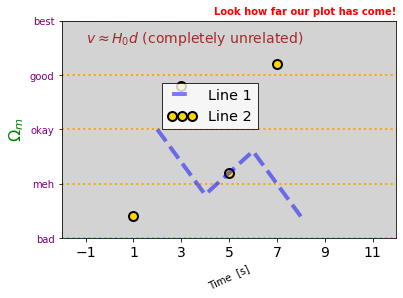

In [13]:
# Main plotting calls
plt.plot(x, y, color = 'blue', ls = '--', lw = 4, alpha=0.5, label='Line 1', zorder = 2)
plt.plot(x2, y2, color = 'gold', ls = 'None', marker = 'o', ms = 9, mec = 'black',
         mew = 2, label='Line 2', zorder = 1)

# Legend
plt.legend(fontsize='x-large', ncol=1, numpoints=3, fancybox=False, 
           frameon=True, edgecolor='black', loc=(0.3,0.5))

# Axes labels
plt.xlabel('Time  [s]', fontsize=10, rotation=25)
plt.ylabel(r'$\Omega_{m}$', fontsize=16, color='green')

# Axes limits
plt.xlim(xmin=-2, xmax=12)
plt.ylim(0, 10)

# Tick locators and labels
plt.xticks([-1, 1, 3, 5, 7, 9, 11], fontsize=14)
plt.yticks([0, 2.5, 5, 7.5, 10], ['bad', 'meh', 'okay', 'good', 'best'], color='purple')

# Title
plt.title('Look how far our plot has come!', {'fontsize':10, 'fontweight':'bold'}, loc='right', color='red')

# Text
plt.text(-1, 9, r'$v\approx H_{0}d$ (completely unrelated)', fontsize=14, color='brown')

# Grid
plt.grid(True, which='major', axis='y', ls=':', lw=2, color='orange')

# Facecolor
ax = plt.gca()
ax.set_facecolor('lightgray');

## Saving Plots
The plot's no good to your paper if it only exists in your Jupyter notebook. Saving is important, and thankfully it's pretty easy. The function is ```plt.savefig()```. The first arguemnt should be the filename as a string, including the file path, if it's not in the same directory as the notebook: 'your/file/path/goes/here/filename.extension', where the extension can be png, pdf, ps, and eps, amongst others.

There's a variety of other keywords for ```plt.savefig()```, some of which are more useful than others. For plots like ours where some parts extend beyond where they're expected (thanks to the unusual axes labels, in our case), including ```bbox_inches='tight'``` can keep it from cutting off parts of the plot when saving. The keyword ```facecolor``` changes whether there's color behind the portion where the axes labels are. Adding ```facecolor='None'``` can make for an interesting effect on posters, where you might have a colored background behind the plot. The central portion will be white (or whatever you set the facecolor to be) and will stand out prominantly, while the axes labels will still be visible but there won't be a jarring white box around your plot, as you can see in the image below.

![facecolor='white' vs. facecolor='None'](Slide1.png)

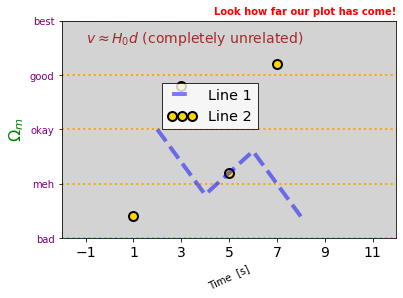

In [14]:
# Main plotting calls
plt.plot(x, y, color = 'blue', ls = '--', lw = 4, alpha=0.5, label='Line 1', zorder = 2)
plt.plot(x2, y2, color = 'gold', ls = 'None', marker = 'o', ms = 9, mec = 'black',
         mew = 2, label='Line 2', zorder = 1)

# Legend
plt.legend(fontsize='x-large', ncol=1, numpoints=3, fancybox=False, 
           frameon=True, edgecolor='black', loc=(0.3,0.5))

# Axes labels
plt.xlabel('Time  [s]', fontsize=10, rotation=25)
plt.ylabel(r'$\Omega_{m}$', fontsize=16, color='green')

# Axes limits
plt.xlim(xmin=-2, xmax=12)
plt.ylim(0, 10)

# Tick locators and labels
plt.xticks([-1, 1, 3, 5, 7, 9, 11], fontsize=14)
plt.yticks([0, 2.5, 5, 7.5, 10], ['bad', 'meh', 'okay', 'good', 'best'], color='purple')

# Title
plt.title('Look how far our plot has come!', {'fontsize':10, 'fontweight':'bold'}, loc='right', color='red')

# Text
plt.text(-1, 9, r'$v\approx H_{0}d$ (completely unrelated)', fontsize=14, color='brown')

# Grid
plt.grid(True, which='major', axis='y', ls=':', lw=2, color='orange')

# Facecolor
ax = plt.gca()
ax.set_facecolor('lightgray')

plt.savefig('fig-1.pdf', bbox_inches='tight');

## Formatting Fun!
For publications, you'll probably spend a long time tweaking your plots over and over. This is normal! The formattion functions and options listed above are some of the most common ones, but there's far more you can do. Check out the latest [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) for a list of functions with links to detailed documentation for each one, and check out [this page](https://matplotlib.org/gallery/index.html) of examples with source code. Personally, I prefer this [matplotlib function index](https://matplotlib.org/api/pyplot_api.html); while it's technically for an older version of matplotlib, very little has changed, and it has all the information for each function listed out. I control-F to find the function I want and have all the information right there, without having to click on another link. It's a useful tab to always have open.

# Practice Problems

## Exercise 1
The main code for our plot up above is copied below. Change the ```plt.plot()``` keywords for both datasets until you have:

* different colors than before
* different linestyles for both
* different markerstyles for one or both
* different alphas and zorders that make sense together

Check out the [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) for ```plt.plot``` to read more about the keywords discussed earlier.

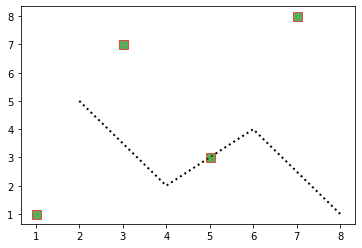

In [29]:
# Main plotting calls -- alter this code!
plt.plot(x, y, color = 'black', ls = ':', lw = 2, alpha=1.0, label='Line 1', zorder = 1)
plt.plot(x2, y2, color = 'green', ls = 'None', marker = 's', ms = 9, mec = 'red',
         mew = 1, label='Line 2', alpha = 0.65, zorder = 2);

## Exercise 2
Return the x/y-axis back to standard formatting--i.e., black text, no rotation, uniform fontsize, etc. Try to find a good value for the fontsize on the x/y labels. Then, let's focus on the axes limits and ticks.

  1. Set new x/y limits. What happens if you supply the limits backwards (ex: plt.xlim(10, 0))?
  2. Change the location of the tick marks on both axes so that you have
    * 5 equally spaced ticks: 2 at the ends, 3 in between, and
    * 8 equally spaced ticks: 2 at the ends and 6 in between. 
  
  These don't have to be _perfectly_ evenly spaced, but they should be within a few decimals. Alter the fontsize based on the number of ticks you include. Compare to the default choice of limits and ticks for the plots earlier.

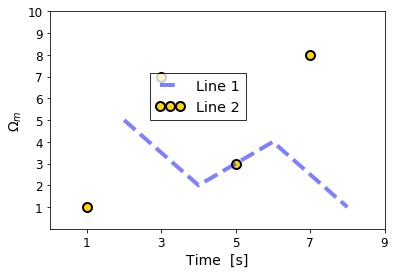

In [42]:
# Main plotting calls
plt.plot(x, y, color = 'blue', ls = '--', lw = 4, alpha=0.5, label='Line 1', zorder = 2)
plt.plot(x2, y2, color = 'gold', ls = 'None', marker = 'o', ms = 9, mec = 'black',
         mew = 2, label='Line 2', zorder = 1)

# Legend
plt.legend(fontsize='x-large', ncol=1, numpoints=3, fancybox=False, 
           frameon=True, edgecolor='black', loc=(0.3,0.5))


#  * Alter the code below to standard settings and then complete parts 1 and 2 *

# Axes labels
plt.xlabel('Time  [s]', fontsize=14)
plt.ylabel(r'$\Omega_{m}$', fontsize=14)

# Axes limits
plt.xlim(xmin=0, xmax=9)
plt.ylim(0, 10)

# Tick locators and labels
plt.xticks([1, 3, 5, 7, 9], fontsize=12)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], fontsize=12);

## Exercise 3
Color is quite important for clarity and aesthetics. Change the two calls below to both be lines--i.e., there should be no ```marker``` keywords, and ```ls``` should not be set to 'None'.

1. Find a good color combination for your two lines, and then find a bad combination, whether it's eye-watering bad or just difficult to tell apart.
2. Check out this [website](https://colorbrewer2.org/#type=sequential&scheme=Blues&n=3). Play with the number of colors in the plot and see how the different shades are distributed. If you see color combos or just a specific color you like, it lists the hex representation for each shade on the left hand side.
3. Complex plots often make use of a variety of colors to distinguish lines, but that can cripple their effectiveness for color-blind audiences. This [website](https://www.color-blindness.com/coblis-color-blindness-simulator/) shows you what an image looks like to those with an assortment of color vision handicaps. You can look at default image or upload your own. If you have time now or later, I suggest uploading your plot (must be .png) and see how your color choices hold up.

In [ ]:
# * Alter the keywords below until they're both lines, then change the colors *

# Main plotting calls
plt.plot(x, y, color = 'blue', ls = '--', lw = 4, alpha=0.5, label='Line 1', zorder = 2)
plt.plot(x2, y2, color = 'gold', ls = 'None', marker = 'o', ms = 9, mec = 'black',
         mew = 2, label='Line 2', zorder = 1);

## Exercise 4
Add at least 4 more sets of lines to your plot; they should be a mix of horizontal, vertical, diagonal, and scatter points. Few scientific plots show just two sets of data, and they often include one or more horiziontal/vertical lines to indicate limits or interesting regions.

1. Use only two colors for your 6+ sets of lines. What keywords can you use to make the lines distinguisable? Toy with the other keywords until you have a plot that is still readable.
2. This time, use only 2 linestyles. What colors and markers can you use to make the sets of data distinguishable? Keep it mind exercise 3 when selecting colors.
3. Include at least 3 of your lines in the legend, the more the merrier. Check out the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) and play with the legend settings. You don't want it covering up data, but it should still be readable and in a place that both draws the eye and doesn't distract from the overall plot. This is hard to describe, but you'll know it when you see it--when you don't have to search for the legend, but it doesn't dominate what you see in the plot, either.

In [ ]:
# * Add more lines and experiment with clarity *

# Main plotting calls
plt.plot(x, y, color = 'blue', ls = '--', lw = 4, alpha=0.5, label='Line 1', zorder = 2)
plt.plot(x2, y2, color = 'gold', ls = 'None', marker = 'o', ms = 9, mec = 'black',
         mew = 2, label='Line 2', zorder = 1)

# Legend
plt.legend(fontsize='x-large', ncol=1, numpoints=3, fancybox=False, 
           frameon=True, edgecolor='black', loc=(0.3,0.5));

## Exercise 5
Let's face it: the plot we made in the lesson portion was not pretty, at all. The formatting was exaggerated for the sake of instruction. Using the concepts from the previous four exercises, alter the code below until you're happy with the results. Remove, alter, and add features until you're happy with the figure.

In [ ]:
# * Make this less bad *

# Main plotting calls
plt.plot(x, y, color = 'blue', ls = '--', lw = 4, alpha=0.5, label='Line 1', zorder = 2)
plt.plot(x2, y2, color = 'gold', ls = 'None', marker = 'o', ms = 9, mec = 'black',
         mew = 2, label='Line 2', zorder = 1)

# Legend
plt.legend(fontsize='x-large', ncol=1, numpoints=3, fancybox=False, 
           frameon=True, edgecolor='black', loc=(0.3,0.5))

# Axes labels
plt.xlabel('Time  [s]', fontsize=10, rotation=25)
plt.ylabel(r'$\Omega_{m}$', fontsize=16, color='green')

# Axes limits
plt.xlim(xmin=-2, xmax=12)
plt.ylim(0, 10)

# Tick locators and labels
plt.xticks([-1, 1, 3, 5, 7, 9, 11], fontsize=14)
plt.yticks([0, 2.5, 5, 7.5, 10], ['bad', 'meh', 'okay', 'good', 'best'], color='purple')

# Title
plt.title('Look how far our plot has come!', {'fontsize':10, 'fontweight':'bold'}, loc='right', color='red')

# Text
plt.text(-1, 9, r'$v\approx H_{0}d$ (completely unrelated)', fontsize=14, color='brown')

# Grid
plt.grid(True, which='major', axis='y', ls=':', lw=2, color='orange')

# Facecolor
ax = plt.gca()
ax.set_facecolor('lightgray');